In [135]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [136]:
headers = ['Sequence Name', 'MCG', 'GVH', 'LIP', 'CHG', 'AAC', 'ALM1', 'ALM2', 'Class Distribution']
df = pd.read_csv('./ecoli.csv', delim_whitespace=True, names=headers)

In [137]:
df.head()

,Sequence Name,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,Class Distribution
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [138]:
df.drop('Sequence Name', axis=1, inplace=True)

In [139]:
df.replace(('cp', 'im', 'pp', 'imU', 'om', 'omL', 'imL', 'imS'),(1,2,3,4,5,6,7,8), inplace=True)

In [140]:
df.head()

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,Class Distribution
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,1
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,1
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,1
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,1
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,1


In [141]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MCG,336.0,0.500060,0.194634,0.00,0.34,0.500,0.6625,0.89
GVH,336.0,0.500000,0.148157,0.16,0.40,0.470,0.5700,1.00
LIP,336.0,0.495476,0.088495,0.48,0.48,0.480,0.4800,1.00
CHG,336.0,0.501488,0.027277,0.50,0.50,0.500,0.5000,1.00
AAC,336.0,0.500030,0.122376,0.00,0.42,0.495,0.5700,0.88
ALM1,336.0,0.500179,0.215751,0.03,0.33,0.455,0.7100,1.00
ALM2,336.0,0.499732,0.209411,0.00,0.35,0.430,0.7100,0.99
Class Distribution,336.0,2.241071,1.442917,1.00,1.00,2.000,3.0000,8.00


In [142]:
df.shape

(336, 8)

In [143]:
df.corr(method='pearson')

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,Class Distribution
MCG,1.000000,0.454805,0.146841,0.070266,0.220699,0.396979,0.167086,0.666179
GVH,0.454805,1.000000,0.043804,0.018466,0.069824,0.173492,-0.120199,0.461910
LIP,0.146841,0.043804,1.000000,0.311951,0.070190,0.095788,-0.057570,0.396161
CHG,0.070266,0.018466,0.311951,1.000000,-0.044726,-0.007654,-0.052188,0.180465
AAC,0.220699,0.069824,0.070190,-0.044726,1.000000,0.279482,0.252675,0.380156
ALM1,0.396979,0.173492,0.095788,-0.007654,0.279482,1.000000,0.809324,0.425313
ALM2,0.167086,-0.120199,-0.057570,-0.052188,0.252675,0.809324,1.000000,0.100190
Class Distribution,0.666179,0.461910,0.396161,0.180465,0.380156,0.425313,0.100190,1.000000


In [144]:
X = df.values[:, 0:7]
Y = df.values[:, 7]

In [145]:
X

array([[0.49, 0.29, 0.48, ..., 0.56, 0.24, 0.35],
       [0.07, 0.4 , 0.48, ..., 0.54, 0.35, 0.44],
       [0.56, 0.4 , 0.48, ..., 0.49, 0.37, 0.46],
       ...,
       [0.61, 0.6 , 0.48, ..., 0.44, 0.39, 0.38],
       [0.59, 0.61, 0.48, ..., 0.42, 0.42, 0.37],
       [0.74, 0.74, 0.48, ..., 0.31, 0.53, 0.52]])

In [146]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 8.,
       8., 7., 7., 4., 4.

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
N, D = X_train.shape

In [148]:
N

268

In [149]:
D

7

In [150]:
X_train

array([[0.81, 0.53, 0.48, ..., 0.57, 0.87, 0.88],
       [0.33, 0.45, 0.48, ..., 0.45, 0.88, 0.89],
       [0.49, 0.43, 0.48, ..., 0.49, 0.3 , 0.4 ],
       ...,
       [0.68, 0.82, 0.48, ..., 0.38, 0.65, 0.56],
       [0.12, 0.67, 0.48, ..., 0.74, 0.58, 0.63],
       [0.49, 0.61, 1.  , ..., 0.56, 0.71, 0.74]])

In [151]:
y_train

array([4., 2., 1., 5., 3., 1., 2., 3., 1., 1., 1., 2., 3., 2., 1., 1., 6.,
       5., 7., 4., 1., 2., 1., 4., 1., 2., 4., 1., 5., 1., 1., 1., 4., 1.,
       2., 5., 3., 2., 1., 2., 8., 1., 1., 4., 3., 3., 1., 2., 3., 2., 1.,
       2., 2., 1., 5., 1., 4., 2., 1., 2., 5., 1., 1., 3., 2., 3., 1., 2.,
       1., 2., 4., 1., 2., 3., 3., 2., 1., 3., 1., 2., 4., 3., 5., 3., 2.,
       3., 1., 1., 2., 1., 4., 2., 1., 1., 2., 1., 1., 1., 3., 4., 4., 1.,
       5., 3., 1., 1., 4., 1., 5., 4., 6., 1., 4., 1., 2., 4., 3., 4., 1.,
       1., 2., 1., 2., 1., 2., 1., 2., 3., 2., 1., 1., 2., 4., 1., 6., 2.,
       2., 4., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 5., 1., 4., 3., 2.,
       2., 1., 4., 4., 1., 2., 4., 1., 2., 2., 3., 3., 1., 3., 2., 2., 3.,
       8., 2., 2., 1., 4., 1., 2., 1., 2., 2., 1., 4., 1., 2., 3., 1., 1.,
       1., 1., 3., 1., 1., 3., 3., 4., 1., 5., 1., 1., 2., 3., 5., 1., 1.,
       1., 3., 3., 5., 1., 1., 5., 1., 4., 2., 2., 2., 1., 1., 2., 6., 1.,
       1., 1., 3., 5., 1.

In [152]:
y_test

array([2., 1., 4., 2., 1., 4., 3., 1., 1., 1., 1., 3., 7., 1., 1., 1., 1.,
       5., 2., 2., 3., 3., 1., 3., 1., 1., 2., 1., 2., 1., 1., 1., 4., 6.,
       4., 1., 1., 2., 1., 1., 3., 1., 2., 1., 1., 1., 3., 2., 1., 1., 1.,
       2., 3., 2., 5., 5., 1., 1., 3., 1., 1., 2., 1., 1., 3., 1., 3., 1.])

In [153]:
K = len(set(y_train))
test_K = len(set(y_test))
print("number of classes:", K)
print(test_K)

number of classes: 8
7


In [154]:
X_train[0].shape

(7,)

In [155]:
print("x_train.shape:", X_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape: (268, 7)
y_train.shape (268,)


In [156]:
results = {}
models = {}

array = [128, 256, 512, 1024, 2048]

while len(results) < 3:
  relu = random.choice(array)
  dropout = 0.2
  softmax = len(set(y_train)) + 1
  epochs = 50

  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(relu, input_shape=X_train[0].shape, activation='relu'),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(softmax, activation='softmax')
  ])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs)
  evaluation = model.evaluate(X_test, y_test)

  if (evaluation[1] > 0.84):
    models[(relu, dropout, softmax, epochs)] = model
    results[(relu, dropout, softmax, epochs)] = r
  
print(results)



Epoch 1/50
9/9 [==============================] - 0s 19ms/step - loss: 2.0993 - accuracy: 0.3731 - val_loss: 1.9069 - val_accuracy: 0.6029
Epoch 2/50
9/9 [==============================] - 0s 7ms/step - loss: 1.8456 - accuracy: 0.4963 - val_loss: 1.6769 - val_accuracy: 0.6176
Epoch 3/50
9/9 [==============================] - 0s 7ms/step - loss: 1.6694 - accuracy: 0.4627 - val_loss: 1.5133 - val_accuracy: 0.5441
Epoch 4/50
9/9 [==============================] - 0s 7ms/step - loss: 1.5658 - accuracy: 0.4552 - val_loss: 1.4236 - val_accuracy: 0.6176
Epoch 5/50
9/9 [==============================] - 0s 7ms/step - loss: 1.5017 - accuracy: 0.4888 - val_loss: 1.3834 - val_accuracy: 0.6765
Epoch 6/50
9/9 [==============================] - 0s 7ms/step - loss: 1.4561 - accuracy: 0.5299 - val_loss: 1.3350 - val_accuracy: 0.6912
Epoch 7/50
9/9 [==============================] - 0s 7ms/step - loss: 1.3980 - accuracy: 0.5746 - val_loss: 1.3022 - val_accuracy: 0.6912
Epoch 8/50
9/9 [=================

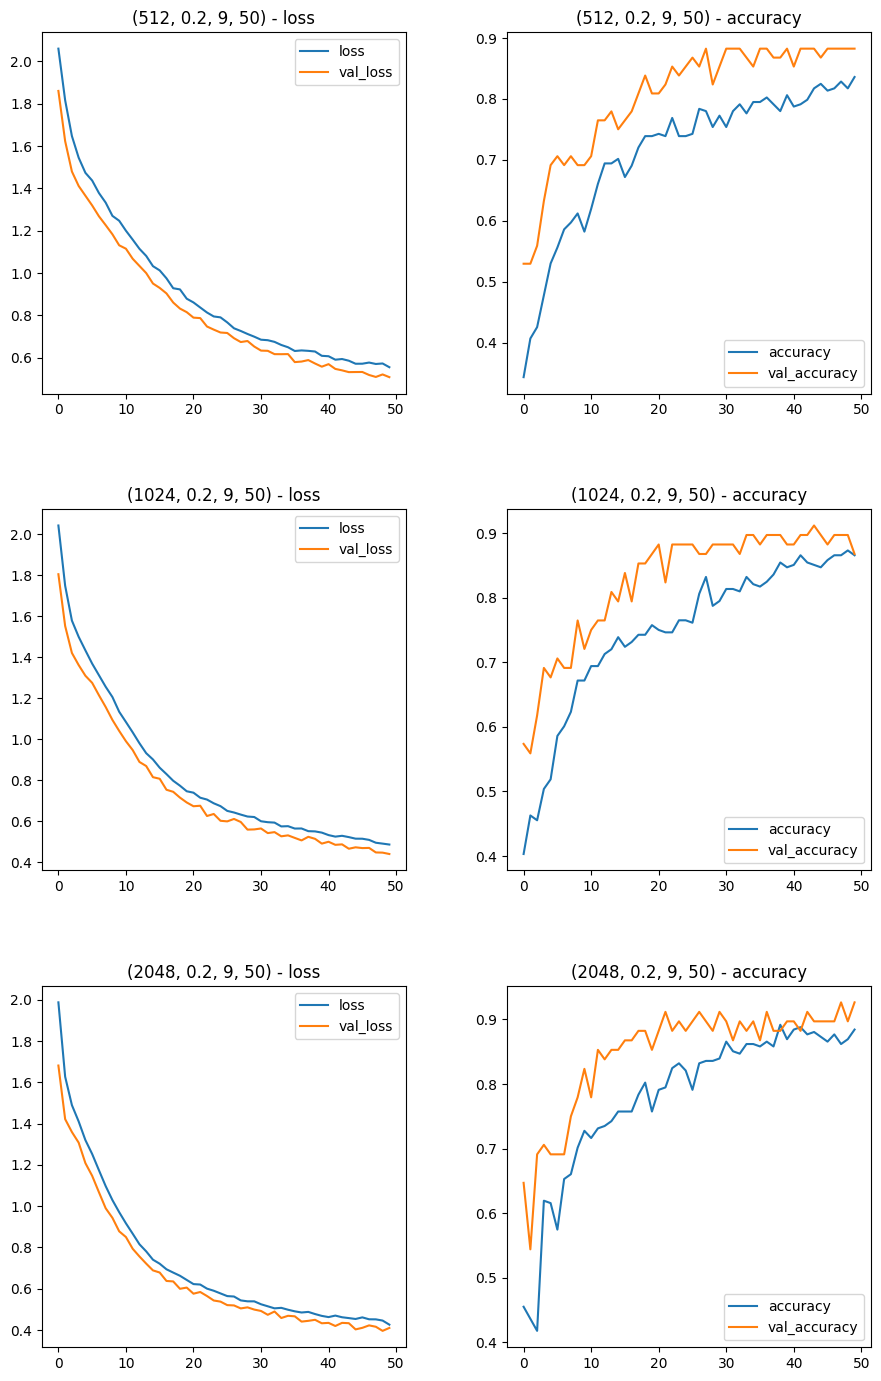

In [182]:
import math

fig, axs = plt.subplots(3, 2, figsize=(10, 15))
axs = np.array(axs)


for i, ax in enumerate(fig.axes):
  if (i % 2 == 0):
    key = list(results)[math.floor(i/2)]
    ax.set_title(f"{key} - loss")
    ax.plot(results[key].history['loss'], label='loss')
    ax.plot(results[key].history['val_loss'], label='val_loss')
    ax.legend()
  else:
    key = list(results)[math.floor(i/2)]
    ax.set_title(f"{key} - accuracy")
    ax.plot(results[key].history['accuracy'], label='accuracy')
    ax.plot(results[key].history['val_accuracy'], label='val_accuracy')
    ax.legend()
fig.tight_layout(pad=5.0)

In [159]:
evaluations = {}

for model in models:
  evaluations[model] = models[model].evaluate(X_test, y_test)

print(evaluations)

3/3 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.9265
{(512, 0.2, 9, 50): [0.508118212223053, 0.8823529481887817], (1024, 0.2, 9, 50): [0.4408946633338928, 0.8676470518112183], (2048, 0.2, 9, 50): [0.4105035364627838, 0.9264705777168274]}


In [160]:
best = None

for model in evaluations:
  if best == None:
    best = model
  else:
    if evaluations[model][1] >= evaluations[best][1] and evaluations[model][0] < evaluations[best][0]:
      best = model

  print(model)
  print(evaluations[model])

print(best)

(512, 0.2, 9, 50)
[0.508118212223053, 0.8823529481887817]
(1024, 0.2, 9, 50)
[0.4408946633338928, 0.8676470518112183]
(2048, 0.2, 9, 50)
[0.4105035364627838, 0.9264705777168274]
(2048, 0.2, 9, 50)


In [161]:
P = models[best].predict(X_test).argmax(axis=1)

3/3 [==============================] - 0s 2ms/step


In [162]:
P.size

68

In [163]:
print(f"Manually calculated accuracy: {np.mean(P == y_test)}")
print(f"Evaluate output: {models[best].evaluate(X_test, y_test)}")

Manually calculated accuracy: 0.9264705882352942
3/3 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.9265
Evaluate output: [0.4105035364627838, 0.9264705777168274]


3/3 [==============================] - 0s 2ms/step
Confusion matrix, without normalization
[[35  1  0  0  0  0  0]
 [ 0 12  0  0  0  0  0]
 [ 1  0 10  0  0  0  0]
 [ 0  2  0  2  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  1  0  0  0  0  0]]


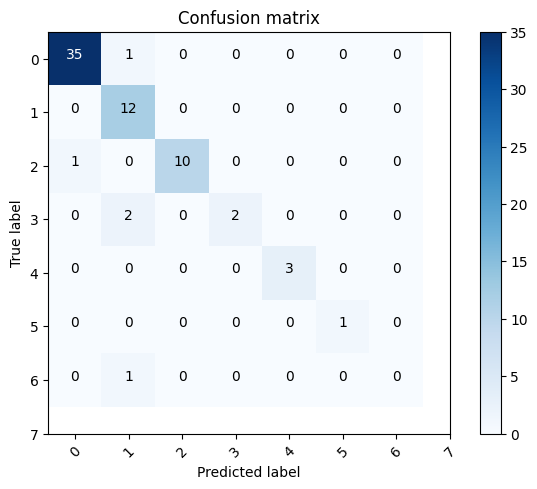

In [180]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = models[best].predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(8)))

In [178]:
count = {}
print(set(Y))
for value in set(Y):
  count[value] = np.count_nonzero(Y == value)

print(count)

{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0}
{1.0: 143, 2.0: 77, 3.0: 52, 4.0: 35, 5.0: 20, 6.0: 5, 7.0: 2, 8.0: 2}
